In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
age_data = pd.read_csv("age_columns.csv")
age_data.head()

,Original Index,ECSAGE,SEDAGE,IRCIGAGE,IRALCAGE,IRMJAGE,IRCOCAGE,IRHERAGE,IRHALAGE,IRECSAGE,IRINHAGE,IRANLAGE,IRTRNAGE,IRSTMAGE,IRMTHAGE,PSYAGE2,SUMAGE,IEMAGE
0,0,991,991,19,991,991,991,991,991,991,991,991,991,991,991,991,991,991
1,1,17,991,14,13,14,16,991,17,17,991,991,16,991,991,16,14,16
2,2,991,991,14,16,991,991,991,991,991,991,991,991,991,991,991,991,991
3,3,991,991,16,18,991,991,991,991,991,991,991,991,991,991,991,991,991
4,4,991,991,14,18,991,991,991,991,991,991,991,991,991,991,991,991,991


Checking unique values across all columns

In [9]:
unique_values = []
for col in age_data.columns.drop('Original Index'):
    for i in age_data[col].unique():
        if i not in unique_values:
            unique_values.append(i)
unique_values.sort()
print(unique_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 80, 981, 985, 991, 994, 997, 998]


All values correspond to an age except 981, 985,991, 994, 997, and 998

<b> Code meanings </b>
<ol>
    <li> 981 -- Used in multiple columns. Represents "never used [column substance] logically assigned" </li>
    <li> 985 -- Used in multiple columns. Means "Bad data -- logically assigned".</li>
    <li> 991 -- Used frequently, represents "Never used [column substance]" </li>
    <li> 994 -- Represents "dont know"</li>
    <li> 997 -- Represents "refused" </li>
    <li> 998 -- Represents "blank"</li>
</ol>


Checking how often each code appears

In [22]:
problem_codes = [981,985,991,994,997,998]
for i in problem_codes:
    print ("Total for " + str(i) + ": " + str((age_data.drop('Original Index',axis=1) == i).sum().sum()))

Total for 981: 20
Total for 985: 13
Total for 991: 754090
Total for 994: 39
Total for 997: 20
Total for 998: 191


For every code except 991, will drop those rows for now

In [23]:
drop_codes = problem_codes
drop_codes.remove(991)

In [28]:
x = age_data[~age_data.isin(drop_codes)]

In [33]:
x.isna().sum()

Original Index      5
ECSAGE             87
SEDAGE            196
IRCIGAGE            0
IRALCAGE            0
IRMJAGE             0
IRCOCAGE            0
IRHERAGE            0
IRHALAGE            0
IRECSAGE            0
IRINHAGE            0
IRANLAGE            0
IRTRNAGE            0
IRSTMAGE            0
IRMTHAGE            0
PSYAGE2             0
SUMAGE              0
IEMAGE              0
dtype: int64

In [34]:
age_data = age_data.drop(['ECSAGE','SEDAGE'],axis=1)

In [35]:
problem_codes = [981,985,991,994,997,998]
for i in problem_codes:
    print ("Total for " + str(i) + ": " + str((age_data.drop('Original Index',axis=1) == i).sum().sum()))

Total for 981: 0
Total for 985: 0
Total for 991: 648877
Total for 994: 0
Total for 997: 0
Total for 998: 0


In [37]:
age_data.columns

Index(['Original Index', 'IRCIGAGE', 'IRALCAGE', 'IRMJAGE', 'IRCOCAGE',
       'IRHERAGE', 'IRHALAGE', 'IRECSAGE', 'IRINHAGE', 'IRANLAGE', 'IRTRNAGE',
       'IRSTMAGE', 'IRMTHAGE', 'PSYAGE2', 'SUMAGE', 'IEMAGE'],
      dtype='object')

In [43]:
renames = {'IRCIGAGE':"Cigarrete Age",
          'IRALCAGE' : 'Alcohol Age',
          'IRMJAGE' : 'Marijuana Age',
          'IRCOCAGE': 'Cocaine Age',
          'IRHERAGE' : 'Heroin Age',
          'IRHALAGE': 'Hallucinogen Age',
          'IRECSAGE' : 'Ecstasy Age',
          'IRINHAGE' : 'Inhalent Age',
          'IRANLAGE' : 'Pain-Reliever Age',
          'IRTRNAGE' : 'Tranquelizer Age',
          'IRSTMAGE' : 'Stimulant Age',
          'IRMTHAGE' : 'Meth Age',
          'PSYAGE2' : 'Psychotherapeutics Age',
          'SUMAGE' : 'Any Drug Age',
          'IEMAGE' : 'Any Drug (except marijuana) Age'}
age_data = age_data.rename(mapper=renames,axis=1)

In [44]:
age_data.head()

,Original Index,Cigarrete Age,Alcohol Age,Marijuana Age,Cocaine Age,Heroin Age,Hallucinogen Age,Ecstasy Age,Inhalent Age,Pain-Reliever Age,Tranquelizer Age,Stimulant Age,Meth Age,Psychotherapeutics Age,Any Drug Age,Any Drug (except marijuana) Age
0,0,19,991,991,991,991,991,991,991,991,991,991,991,991,991,991
1,1,14,13,14,16,991,17,17,991,991,16,991,991,16,14,16
2,2,14,16,991,991,991,991,991,991,991,991,991,991,991,991,991
3,3,16,18,991,991,991,991,991,991,991,991,991,991,991,991,991
4,4,14,18,991,991,991,991,991,991,991,991,991,991,991,991,991


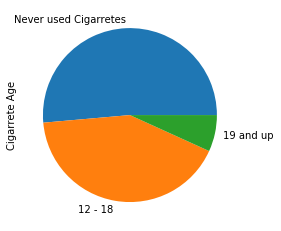

In [56]:
#def single_use_visual(col_name,grouped=True):
def grouper(ele,name):
    if ele < 19:
        return "12 - 18"
    elif ele < 26:
        return "19 and up"
    else:
        return "Never used " + str(name)
age_data['Cigarrete Age'].apply(lambda x: grouper(ele=x,name="Cigarretes")).value_counts().plot.pie()